In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read the excel file
df = pd.read_excel("C:/Documents/Project/2014 BNY (1).xls")
df

,SLNO,AGE,SEX,YEAROFDIAG,RESIDIST,SOURCEDIST,DEATHYR,ICD_10,STYPE
0,1,67,1,2014,VLPM,34,NaN,C189,OUTSTATE
1,2,67,1,2014,VLPM,34,NaN,C61,OUTSTATE
2,3,54,2,2014,TVMA,34,NaN,C509,OUTSTATE
3,4,56,2,2014,TVMA,34,NaN,C349,OUTSTATE
4,5,60,2,2014,VLPM,34,NaN,C509,OUTSTATE
...,...,...,...,...,...,...,...,...,...
61737,61738,70,1,2014,NAGA,34,NaN,C73,OUTSTATE
61738,61739,70,1,2014,CHEN,1,NaN,C495,OTH-PVT
61739,61740,75,1,2014,TVAR,34,NaN,C060,OUTSTATE
61740,61741,62,2,2014,EROD,34,2014.0,C23,OUTSTATE


In [3]:
#describe the dataset
df.describe(include=['object'])

,RESIDIST,ICD_10,STYPE
count,61742,61742,61742
unique,32,366,8
top,CHEN,C509,RT-PVT
freq,6435,8480,22154


In [4]:
#Creating a dataframe having district and the number of people
residist_counts = df['RESIDIST'].value_counts().to_frame()
residist_counts.rename(columns={'RESIDIST':'No of people'}, inplace=True)
residist_counts.index.name = 'RESIDIST'
residist_counts

,No of people
RESIDIST,
CHEN,6435
KANC,4587
TVLR,4051
COIM,3828
VELL,2803
MADU,2598
VLPM,2544
SALE,2525
TRCY,2475


In [5]:
#Creating a dataframe having ICD_10 and the number of people
ICD_counts = df['ICD_10'].value_counts().to_frame()
ICD_counts.rename(columns={'ICD_10':'No of people'}, inplace=True)
ICD_counts.index.name = 'ICD_10'
ICD_counts

,No of people
ICD_10,
C509,8480
C539,7520
C169,2964
C80,2949
C349,2406
...,...
C841,1
C103,1
C572,1


In [6]:
#Creating a dataframe having Source Type and the number of people
STYPE_counts = df['STYPE'].value_counts().to_frame()
STYPE_counts.rename(columns={'STYPE':'No of people'}, inplace=True)
STYPE_counts.index.name = 'STYPE'
STYPE_counts

,No of people
STYPE,
RT-PVT,22154
RT-GOVT,15003
OTH-PVT,8573
OUTSTATE,6948
OTH-GOVT,5761
VSD,2867
PATH-IMAG,264
SUPP-CARE,172


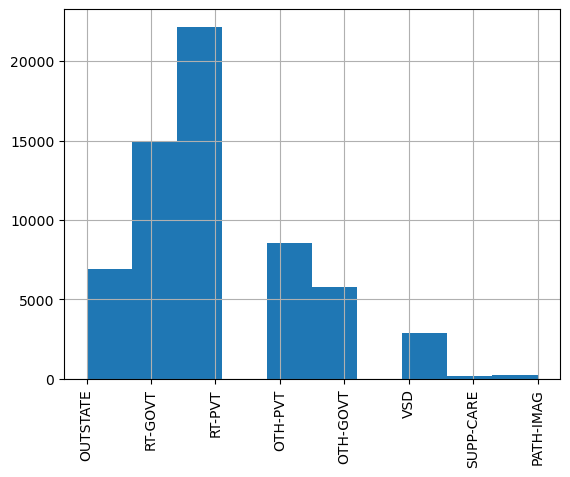

In [7]:
#Visualize source type and number of people in a histogram
df['STYPE'].hist()
plt.xticks(rotation='vertical')
plt.show()

## Representation for the number of males and females in the population

C:\Users\sweth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


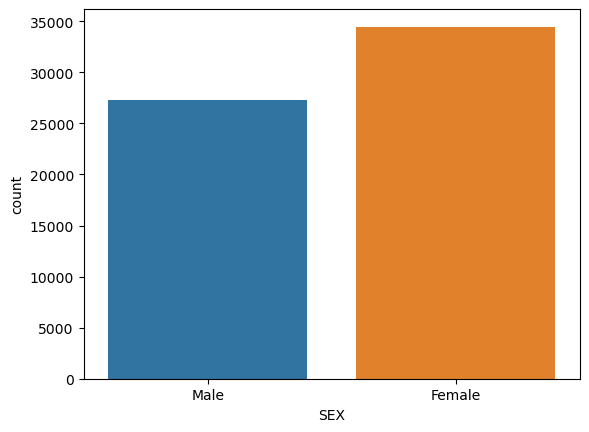

In [8]:
#Visualize the number of male and females in the dataset
sns.countplot(df['SEX'])
plt.xticks([0,1],['Male', 'Female'])
plt.show()

## Age Distribution

C:\Users\sweth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


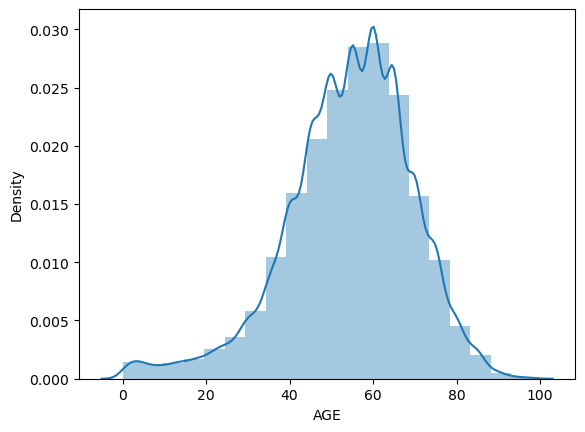

In [9]:
# To check the age distribution in the dataset
sns.distplot(df['AGE'], bins=20)
plt.show()

In [10]:
#Next task is to add a new column to specify the type of cancer based on ICD_10 code
#finding out the number of distinct ICD_10 codes present in the dataset
df.ICD_10.unique()

array(['C189', 'C61', 'C509', 'C349', 'C169', 'C160', 'C539', 'C01',
       'C060', 'C859', 'C492', 'C609', 'C154', 'C155', 'C402', 'C220',
       'C56', 'C069', 'C447', 'C910', 'C499', 'C439', 'C73', 'C109',
       'C159', 'C541', 'C20', 'C508', 'C52', 'C812', 'C749', 'C819',
       'C921', 'C920', 'C950', 'C959', 'C222', 'C629', 'C716', 'C966',
       'C918', 'C64', 'C187', 'C07', 'C530', 'C179', 'C19', 'C412',
       'C437', 'C321', 'C900', 'C23', 'C787', 'C341', 'C329', 'C679',
       'C119', 'C712', 'C229', 'C140', 'C139', 'C130', 'C320', 'C711',
       'C183', 'C696', 'C259', 'C030', 'C221', 'C445', 'C021', 'C029',
       'C12', 'C182', 'C180', 'C186', 'C241', 'C343', 'C833', 'C419',
       'C719', 'C451', 'C774', 'C049', 'C400', 'C163', 'C023', 'C929',
       'C717', 'C411', 'C699', 'C695', 'C050', 'C150', 'C713', 'C442',
       'C718', 'C310', 'C161', 'C414', 'C780', 'C342', 'C031', 'C153',
       'C211', 'C846', 'C519', 'C770', 'C710', 'C090', 'C903', 'C480',
       'C227', 'C

#### Next is to duplicate the ICD_10 column and name the column as Cancer_Type. Then replace the ICD_10 codes with respective cancer types.

In [11]:
#duplicate the ICD_10 column:
df['Cancer_Type'] = df.loc[:, 'ICD_10']

In [12]:
#check if column has been replicated
df

,SLNO,AGE,SEX,YEAROFDIAG,RESIDIST,SOURCEDIST,DEATHYR,ICD_10,STYPE,Cancer_Type
0,1,67,1,2014,VLPM,34,NaN,C189,OUTSTATE,C189
1,2,67,1,2014,VLPM,34,NaN,C61,OUTSTATE,C61
2,3,54,2,2014,TVMA,34,NaN,C509,OUTSTATE,C509
3,4,56,2,2014,TVMA,34,NaN,C349,OUTSTATE,C349
4,5,60,2,2014,VLPM,34,NaN,C509,OUTSTATE,C509
...,...,...,...,...,...,...,...,...,...,...
61737,61738,70,1,2014,NAGA,34,NaN,C73,OUTSTATE,C73
61738,61739,70,1,2014,CHEN,1,NaN,C495,OTH-PVT,C495
61739,61740,75,1,2014,TVAR,34,NaN,C060,OUTSTATE,C060
61740,61741,62,2,2014,EROD,34,2014.0,C23,OUTSTATE,C23


In [13]:
#add the symbol '_' to all the ICD_10 codes in the ICD_10 column so that when we use the replace statement in the next step.
df['ICD_10'] = '_' + df['ICD_10'].astype(str)

In [14]:
#Replace ICD_10 code with cancer type in the Cancer_Type column

df = df.replace(['C189', 'C61', 'C509', 'C349', 'C169', 'C160', 'C539', 'C01','C060', 'C859'],['colon','prostate','breast','lung','stomach','stomach','cervix uteri','oral','oral','non hodgkin lymphoma'])
df = df.replace(['C492', 'C609', 'C154', 'C155', 'C402', 'C220','C56', 'C069', 'C447', 'C910'],['limb and hip','penis','esophagus','esophagus','bone','liver','ovary','oral','skin','acute lymphoblastic leukeumia'])
df = df.replace(['C499', 'C439', 'C73', 'C109','C159', 'C541', 'C20', 'C508', 'C52', 'C812', 'C749', 'C819','C921', 'C920', 'C950', 'C959', 'C222', 'C629', 'C716','C966'],['connective and soft tissue','skin','thyroid','oropharyngeal','esophagus','endometrium','rectum','breast','vagina','hodgkin lymphoma','adrenal gland','hodgkin lymphoma','chronic myeloid leukemia','acute myeloblastic leukemia','acute leukemia','leukemia','liver','testis','brain','pancreas'])
df = df.replace(['C918', 'C64', 'C187', 'C07', 'C530', 'C179', 'C19', 'C412','C437', 'C321'],['leukemia', 'kidney','colon','parotid gland','endocervix','small intestine','large intestine','vertebral column','limb and hip','supraglottis'])
df = df.replace(['C900', 'C23', 'C787', 'C341', 'C329', 'C679','C119', 'C712', 'C229', 'C140'],['multiple myeloma','gallbladder','liver and bile duct','lung','larynx','bladder','nasopharynx','ear','liver','pharynx'])
df = df.replace(['C139', 'C130', 'C320', 'C711','C183', 'C696', 'C259', 'C030', 'C221', 'C445'],['hypopharynx','oral','glottis','brain','liver','orbit','pancreas','oral','liver and bile duct','skin'])
df = df.replace(['C021', 'C029','C12', 'C182', 'C180', 'C186', 'C241', 'C343', 'C833', 'C419'],['oral','oral','pyriform sinus','colon','large intestine','colon','small intestine','lung','B cell lymphoma','bone'])
df = df.replace(['C719', 'C451', 'C774', 'C049', 'C400', 'C163', 'C023', 'C929','C717', 'C411'],['brain','abdomen','limb lymph nodes','oral','bone','stomach','oral','myeloid leukemia','brain','oral'])
df = df.replace(['C699', 'C695', 'C050', 'C150', 'C713', 'C442','C718', 'C310', 'C161', 'C414'],['eye','orbit','oral','esophagus','brain','skin','brain','maxillary sinus','stomach','bone'])
df = df.replace(['C780', 'C342', 'C031', 'C153','C211', 'C846', 'C519', 'C770', 'C710', 'C090'],['lung','lung','oral','esophagus','anal canal','lymph nodes','vulva','spleen','brain','oral'])
df = df.replace(['C903', 'C480','C227', 'C80', 'C300', 'C503', 'C793', 'C240', 'C504', 'C837'],['bone cancer','retroperitoneum','liver','unspecified site','nasal cavity','breast','brain','liver','breast','burkitt lymphoma'])
df = df.replace(['C441', 'C844', 'C502', 'C449', 'C000', 'C171', 'C165', 'C131','C170', 'C162'],['skin', 'T-cell lymphoma','breast','skin','lip','small intestine','stomach','hypopharyngeal','stomach','stomach'])
df = df.replace(['C491', 'C786', 'C185', 'C039', 'C062', 'C001','C158', 'C830', 'C435', 'C382'],['connective and soft tissue','adrenal gland','colon','oral','oral','lip','esophagus','B-cell lymphoma','skin','mediastinum'])
df = df.replace(['C779', 'C059', 'C493', 'C381','C250', 'C251', 'C479', 'C443', 'C494', 'C473'],['lymph node','oral','connective and soft tissue','mediastinum','pancreas','pancreas','nerves','skin','connective and soft','nerves'])
df = df.replace(['C692', 'C66','C789', 'C051', 'C080', 'C690', 'C501', 'C475', 'C348', 'C811'],['eye','ureter','unspecified site','oral','oral','eye','breast','pelvis','lung','hodgkin lymphoma'])
df = df.replace(['C433', 'C383', 'C009', 'C172', 'C224', 'C700', 'C184', 'C269','C471', 'C218'],['skin','trachea','lip','small intestine','liver','urinary organ','colon','stomach','nerves','rectum'])
df = df.replace(['C795', 'C495', 'C100', 'C099', 'C322', 'C715','C444', 'C714', 'C781', 'C37'],['bone','connective and soft tissue','oral','tonsil','subglottis','brain','skin','brain','mediastinum','thymus'])
df = df.replace(['C457', 'C925', 'C765', 'C410','C089', 'C797', 'C164', 'C482', 'C55', 'C773'],['mesothelioma','acute myelomonocytic leukemia','limb','bone','salivary gland','adrenal gland','stomach','peritoneum','uterus','lymph nodes'])
df = df.replace(['C319', 'C835','C531', 'C821', 'C490', 'C829', 'C810', 'C911', 'C785', 'C764'],['accessory sinus','lymphoblastic lymphoma','exocervix','follicular lymphoma','connective and soft tissue','follicular lymphoma','hodgkin lymphoma','chronic lymphocytic leukemia','large intestine and rectum','limb'])
df = df.replace(['C384', 'C760', 'C431', 'C020', 'C022', 'C340', 'C401', 'C450','C061', 'C761'],['mediastinum','head, face and neck','eyelid','oral','oral','lung','bone','pleura','oral','thorax'])
df = df.replace(['C772', 'C570', 'C901', 'C181', 'C496', 'C168','C052', 'C210', 'C068', 'C621'],['lymph nodes','fallopian tube','acute lymphoblastic leukemia','appendix','connective and soft tissue','stomach','uvula','esophagus','oral','testis'])
df = df.replace(['C472', 'C600', 'C762', 'C942','D469', 'C004', 'C574', 'C763', 'C470', 'C792', 'C380'],['nerves','prepuce','abdomen','acute megakaryoblastic leukemia','myelodysplastic syndrome','lip','uterine','pelvis','nerves','skin','heart'])
df = df.replace(['C930','C915', 'C510', 'C505', 'C637', 'C741', 'C549', 'C413', 'C260','C440'],['acute monoblastic/monocytic leukemia','T-cell lymphoma','vulva','breast','male genital','adrenal gland','uterus','bone','small intestine','skin'])
df = df.replace(['C446', 'C680', 'C409', 'C249', 'C500', 'C252', 'C311','C506', 'C58', 'C301'],['skin','urethra','bone','gallbladder','breast','pancreas','ethmoidal sinus','breast','placenta','ear'])
df = df.replace(['C212', 'C33', 'C110', 'C796', 'C148','C481', 'C753', 'C813', 'C788', 'C798'],['anal canal','trachea','nasopharynx','ovary','lip','peritoneum','pineal gland','hodgkin lymphoma','unspecified digestive organs','specified sites'])
df = df.replace(['C820', 'C924', 'C102','C577', 'C814', 'C005', 'C775', 'C923', 'C880', 'C750'],['follicular lymphoma','acute promyelocytic leukemia','oropharynx','female genital organs','hodgkin lymphoma','lip','lymph nodes','myeloid sarcoma','waldenstrom macroglobulinemia','parathyroid gland'])
df = df.replace(['C831','C672', 'C720', 'C919', 'C778', 'C258', 'C103', 'C132', 'C138','C782'],['B-cell lymphoma','bladder','spinal cord','lymphoid leukemia','lymph nodes','pancreas','lip','hypopharynx','hypopharynx','pleura'])
df = df.replace(['C166', 'C403', 'D462', 'C632', 'C542', 'C799', 'C65','C601', 'C771', 'C602'],['stomach','bones','refractory anemia with excess of blasts','finger','uterus','unspecified site','urinary tract','penis','lymph nodes','penis'])
df = df.replace(['C729', 'C678', 'C540', 'C543', 'C151','C759', 'C448', 'C006', 'C111', 'C313'],['female genital organ','bladder','isthmus uteri','fundus uteri','esophagus','endocrine gland','skin','lip','nasopharynx','sphenoid sinus'])
df = df.replace(['C670', 'C693', 'C751','C790', 'C791', 'C436', 'C620', 'C933', 'C430', 'C101'],['trigone of bladder','choroid','pituitary gland','kidney and pelvis','bladder','limb','testis','juvenile myelomonocytic leukaemia','lip','epiglottis'])
df = df.replace(['C674','C003', 'C408', 'C865', 'C794', 'C709', 'C476', 'C118', 'C857','C914'],['bladder','lip','bone','T-cell lymphoma','nerves','meninges','nerves','nasopharynx','non hodgkin lymphoma','leukemia'])
df = df.replace(['C740', 'C108', 'C677', 'C113', 'C152', 'C188', 'C390','C498', 'C755', 'C964'],['adrenal gland','oropharynx','urachus','nasopharynx','esophagus','colon','trachea','connective and soft tissue','paraganglia','sarcoma of dendritic cells'])
df = df.replace(['C432', 'C676', 'C841', 'C024', 'C725','C701', 'C572', 'C630', 'C767', 'C091'],['ear','ureter','sézary disease','lip','nerves','brain','round ligament-uterus','epididymis','limb','tonsillar pillar'])
df = df.replace(['C822', 'C434', 'C631','C579', 'C104', 'C058', 'C724', 'C723', 'C081', 'C474'],['follicular lymphoma','scalp and neck','spermatic cord','female genital organ','branchial cleft','oral','nerves','nerves','sublingual gland','nerves'])
df = df.replace(['D471','C253', 'C512', 'C323', 'C852', 'C840', 'C671', 'C931', 'D45','C926'],['chronic myeloproliferative disease','pancreas','clitoris','laryngeal cartilage','lymph nodes','mycosis fungoides','bladder','chronic myelomonocytic leukemia','polycythemia vera','acute myeloid leukemia'])
df = df.replace(['C940', 'C223', 'C848', 'C884', 'C041'],['acute erythroid leukemia','liver','T-cell lymphoma','B-cell lymphoma','oral'
])

In [15]:
#Check if the values have been changed in the Cancer_Type column
df

,SLNO,AGE,SEX,YEAROFDIAG,RESIDIST,SOURCEDIST,DEATHYR,ICD_10,STYPE,Cancer_Type
0,1,67,1,2014,VLPM,34,NaN,_C189,OUTSTATE,colon
1,2,67,1,2014,VLPM,34,NaN,_C61,OUTSTATE,prostate
2,3,54,2,2014,TVMA,34,NaN,_C509,OUTSTATE,breast
3,4,56,2,2014,TVMA,34,NaN,_C349,OUTSTATE,lung
4,5,60,2,2014,VLPM,34,NaN,_C509,OUTSTATE,breast
...,...,...,...,...,...,...,...,...,...,...
61737,61738,70,1,2014,NAGA,34,NaN,_C73,OUTSTATE,thyroid
61738,61739,70,1,2014,CHEN,1,NaN,_C495,OTH-PVT,connective and soft tissue
61739,61740,75,1,2014,TVAR,34,NaN,_C060,OUTSTATE,oral
61740,61741,62,2,2014,EROD,34,2014.0,_C23,OUTSTATE,gallbladder


## Display top 10 cancers affecting population in Tamil Nadu

In [16]:
#Top 10 cancer types affecting majority of the population are put in a new dataframe
Cancer_counts_top = df['Cancer_Type'].value_counts().head(10).to_frame()
#Replacing the column name from Cancer_Type to No of people
Cancer_counts_top.rename(columns={'Cancer_Type':'No of people'}, inplace=True)
#Assigning the first column to be Cancer_Type
Cancer_counts_top.index.name = 'Cancer_Type'
Cancer_counts_top

,No of people
Cancer_Type,
breast,9211
cervix uteri,7520
oral,6075
stomach,3839
lung,3074
unspecified site,2958
esophagus,2177
ovary,1781
rectum,1480


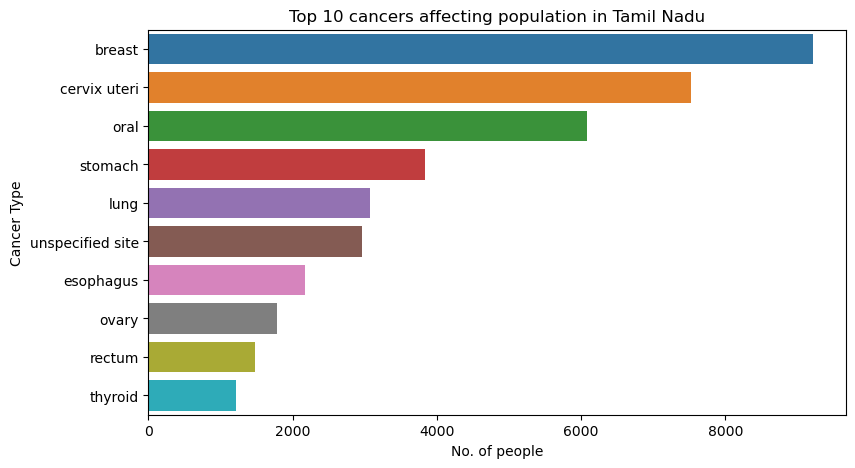

In [18]:
#Make a bar plot with cancer_Type vs number of affected people
cancer_order = df['Cancer_Type'].value_counts().head(10).index
plt.figure(figsize=(9, 5))
sns.countplot(data=df, y='Cancer_Type', order=cancer_order)
plt.title('Top 10 cancers affecting population in Tamil Nadu')
plt.xlabel('No. of people')
plt.ylabel('Cancer Type');

In [20]:
#Find out the top 4 districts with highest population affected by cancer
df['RESIDIST'].value_counts().head(4)

CHEN    6435
KANC    4587
TVLR    4051
COIM    3828
Name: RESIDIST, dtype: int64